<a href="https://colab.research.google.com/github/Kimbaeda/youngwoo/blob/main/yolov3_class_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# plot 제목 한글 깨짐 방지
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/batang.ttc"# 바탕 보통
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

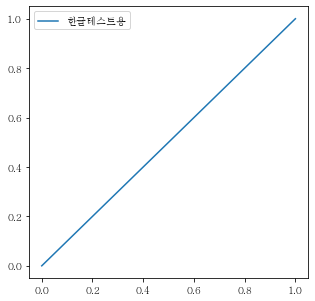

In [ ]:
# 한글 잘 나오는지 테스트
plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], label='한글테스트용')
plt.legend()
plt.show()

In [ ]:
import torch

USE_CUDA = torch.cuda.is_available()
print(USE_CUDA)

device = torch.device('cuda:0' if USE_CUDA else 'cpu')
print('학습을 진행하는 기기:',device)

True
학습을 진행하는 기기: cuda:0


In [ ]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [ ]:
import torch
from IPython.display import Image  # for displaying images
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

random.seed(108)

In [ ]:
import os
import shutil
def make_dir(name):
    if not os.path.isdir(name):
        os.makedirs(name)
        print(name, "폴더가 생성되었습니다.")
    else:
        print("해당 폴더가 이미 존재합니다.")

In [ ]:
%pwd

'd:\\yolo_test'

In [ ]:
make_dir('images')

images 폴더가 생성되었습니다.


In [ ]:
# 하위폴더 리스트
from pprint import pprint
import os
data_path_li = []
for (path, dir, files) in os.walk('D:\상품이미지'):
    data_path_li.append(path)

pprint(data_path_li)

['D:\\상품이미지',
 'D:\\상품이미지\\10091_꼬깔콘고소한맛72G',
 'D:\\상품이미지\\10092_농심오징어집83G',
 'D:\\상품이미지\\10093_농심매운새우깡90G',
 'D:\\상품이미지\\10094_크라운)콘초66G',
 'D:\\상품이미지\\10095_농심바나나킥75G',
 'D:\\상품이미지\\10210_오리온)포카칩오리지널66G',
 'D:\\상품이미지\\20171_농심알새우칩68G',
 'D:\\상품이미지\\30060_농심벌집핏자90G',
 'D:\\상품이미지\\30061_농심포스틱84G',
 'D:\\상품이미지\\30133_포카칩오리지널110G',
 'D:\\상품이미지\\40088_오리온썬핫스파이시맛80G',
 'D:\\상품이미지\\40089_오리온꼬북칩80G',
 'D:\\상품이미지\\40091_꼬깔콘군옥수수맛72G',
 'D:\\상품이미지\\40095_농심새우깡90G',
 'D:\\상품이미지\\40105_롯데)초코빼빼로54G',
 'D:\\상품이미지\\40106_롯데)아몬드빼빼로37G',
 'D:\\상품이미지\\40110_롯데)누드초코빼빼로50G',
 'D:\\상품이미지\\40146_롯데쌀로별오리지널78G',
 'D:\\상품이미지\\40154_오리온태양의맛썬64g',
 'D:\\상품이미지\\50062_농심자갈치90G',
 'D:\\상품이미지\\50117_크라운)콘칩(군옥수수)70G',
 'D:\\상품이미지\\90072_오리온오징어땅콩98G',
 'D:\\상품이미지\\90073_농심)고구마깡83G',
 'D:\\상품이미지\\90076_크라운)죠리퐁74G',
 'D:\\상품이미지\\90123_해태허니버터칩60G',
 'D:\\상품이미지\\90186_오리온땅콩강정80G']


In [ ]:
import glob
import shutil
import os

def jpg_cp_otherdir(src_dir,dst_dir):
  # src_dir # 파일 경로
  # dst_dir # 옮길 경로
    for jpgfile in glob.iglob(os.path.join(src_dir, "*.jpg")):
        shutil.copy(jpgfile, dst_dir)

In [ ]:
# images 폴더로 .jpg 복사
for i in data_path_li:
      jpg_cp_otherdir(i, "D:\yolo_test\images")

In [ ]:
# images 안의 파일 수
import os 
image_li = os.listdir("D:\yolo_test\images") 
print (len(image_li))

2964


In [ ]:
make_dir('annotations')

annotations 폴더가 생성되었습니다.


In [ ]:
# 하위폴더 리스트
from pprint import pprint
import os
data_path_li = []
for (path, dir, files) in os.walk('D:\상품라벨'):
    data_path_li.append(path)

pprint(data_path_li)

['D:\\상품라벨',
 'D:\\상품라벨\\10091_꼬깔콘고소한맛72G',
 'D:\\상품라벨\\10092_농심오징어집83G',
 'D:\\상품라벨\\10093_농심매운새우깡90G',
 'D:\\상품라벨\\10094_크라운)콘초66G',
 'D:\\상품라벨\\10095_농심바나나킥75G',
 'D:\\상품라벨\\10210_오리온)포카칩오리지널66G',
 'D:\\상품라벨\\20171_농심알새우칩68G',
 'D:\\상품라벨\\30060_농심벌집핏자90G',
 'D:\\상품라벨\\30061_농심포스틱84G',
 'D:\\상품라벨\\30133_포카칩오리지널110G',
 'D:\\상품라벨\\40088_오리온썬핫스파이시맛80G',
 'D:\\상품라벨\\40089_오리온꼬북칩80G',
 'D:\\상품라벨\\40091_꼬깔콘군옥수수맛72G',
 'D:\\상품라벨\\40095_농심새우깡90G',
 'D:\\상품라벨\\40105_롯데)초코빼빼로54G',
 'D:\\상품라벨\\40106_롯데)아몬드빼빼로37G',
 'D:\\상품라벨\\40110_롯데)누드초코빼빼로50G',
 'D:\\상품라벨\\40146_롯데쌀로별오리지널78G',
 'D:\\상품라벨\\40154_오리온태양의맛썬64g',
 'D:\\상품라벨\\50062_농심자갈치90G',
 'D:\\상품라벨\\50117_크라운)콘칩(군옥수수)70G',
 'D:\\상품라벨\\90072_오리온오징어땅콩98G',
 'D:\\상품라벨\\90073_농심)고구마깡83G',
 'D:\\상품라벨\\90076_크라운)죠리퐁74G',
 'D:\\상품라벨\\90123_해태허니버터칩60G',
 'D:\\상품라벨\\90186_오리온땅콩강정80G']


In [ ]:
import glob
import shutil
import os

def xml_cp_otherdir(src_dir,dst_dir):
  # src_dir # 파일 경로
  # dst_dir # 옮길 경로
    for xmlfile in glob.iglob(os.path.join(src_dir, "*.xml")):
        #print(xmlfile)
        if xmlfile[-5:] == 'a.xml':
            continue
        else:
            shutil.copy(xmlfile, dst_dir)

In [ ]:
# annotations 폴더로 .xml 복사
for i in data_path_li:
    xml_cp_otherdir(i, r"D:\yolo_test\annotations")

In [ ]:
# xml 안의 파일 수
import os 
xml_li = os.listdir(r"D:\yolo_test\annotations") 
print (len(xml_li))

2964


In [ ]:
print(f'샘플 이미지의 총 개수 : {len(image_li)}, xml 총 개수 : {len(xml_li)}')

샘플 이미지의 총 개수 : 2964, xml 총 개수 : 2964


In [ ]:
import torch
from IPython.display import Image  # for displaying images
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import matplotlib.pyplot as plt

random.seed(108)

In [ ]:
import re
# Function to get the data from XML Annotation
def extract_info_from_xml(xml_file):
    root = ET.parse(xml_file).getroot()
    
    # Initialise the info dict 
    info_dict = {}
    info_dict['bboxes'] = []

    # Parse the XML Tree
    for elem in root:
        # Get the file name 
        if elem.tag == "filename":
            info_dict['filename'] = elem.text
            
        # Get the image size
        elif elem.tag == "size":
            image_size = []
            for subelem in elem:
                image_size.append(int(subelem.text))
            
            info_dict['image_size'] = tuple(image_size)
        
        # Get details of the bounding box 
        elif elem.tag == "object":
            bbox = {}
            for subelem in elem:
                if subelem.tag == "name":
                    bbox["class"] = re.sub("\!|\'|\?|\)|\(|\_","",subelem.text)
                    
                elif subelem.tag == "bndbox":
                    for subsubelem in subelem:
                        bbox[subsubelem.tag] = int(subsubelem.text)            
            info_dict['bboxes'].append(bbox)
    
    return info_dict

In [ ]:
from pprint import pprint
pprint(extract_info_from_xml(r"D:\yolo_test\annotations\10094_0_m_1.xml"))

{'bboxes': [{'class': '크라운콘초66G',
             'xmax': 1320,
             'xmin': 149,
             'ymax': 2360,
             'ymin': 820},
            {'class': '크라운콘초66G',
             'xmax': 2092,
             'xmin': 1110,
             'ymax': 2278,
             'ymin': 848},
            {'class': '크라운콘초66G',
             'xmax': 2791,
             'xmin': 1823,
             'ymax': 2200,
             'ymin': 869}],
 'filename': '10094_0_m_1.jpg',
 'image_size': (2988, 2988, 3)}


In [ ]:
# 하위 마지막폴더 리스트
from pprint import pprint
import os
data_path_li = []
for (path, dir, files) in os.walk('D:\상품라벨'):
    a = os.path.basename(os.path.normpath(path))
    data_path_li.append(a)

pprint(data_path_li)

['상품라벨',
 '10091_꼬깔콘고소한맛72G',
 '10092_농심오징어집83G',
 '10093_농심매운새우깡90G',
 '10094_크라운)콘초66G',
 '10095_농심바나나킥75G',
 '10210_오리온)포카칩오리지널66G',
 '20171_농심알새우칩68G',
 '30060_농심벌집핏자90G',
 '30061_농심포스틱84G',
 '30133_포카칩오리지널110G',
 '40088_오리온썬핫스파이시맛80G',
 '40089_오리온꼬북칩80G',
 '40091_꼬깔콘군옥수수맛72G',
 '40095_농심새우깡90G',
 '40105_롯데)초코빼빼로54G',
 '40106_롯데)아몬드빼빼로37G',
 '40110_롯데)누드초코빼빼로50G',
 '40146_롯데쌀로별오리지널78G',
 '40154_오리온태양의맛썬64g',
 '50062_농심자갈치90G',
 '50117_크라운)콘칩(군옥수수)70G',
 '90072_오리온오징어땅콩98G',
 '90073_농심)고구마깡83G',
 '90076_크라운)죠리퐁74G',
 '90123_해태허니버터칩60G',
 '90186_오리온땅콩강정80G']


In [ ]:
class_name_li = [re.sub("^[0-9]+|\_|\!|\'|\?|\)|\(","", i) for i in data_path_li if len(i) >= 5 ]
pprint(class_name_li)

['꼬깔콘고소한맛72G',
 '농심오징어집83G',
 '농심매운새우깡90G',
 '크라운콘초66G',
 '농심바나나킥75G',
 '오리온포카칩오리지널66G',
 '농심알새우칩68G',
 '농심벌집핏자90G',
 '농심포스틱84G',
 '포카칩오리지널110G',
 '오리온썬핫스파이시맛80G',
 '오리온꼬북칩80G',
 '꼬깔콘군옥수수맛72G',
 '농심새우깡90G',
 '롯데초코빼빼로54G',
 '롯데아몬드빼빼로37G',
 '롯데누드초코빼빼로50G',
 '롯데쌀로별오리지널78G',
 '오리온태양의맛썬64g',
 '농심자갈치90G',
 '크라운콘칩군옥수수70G',
 '오리온오징어땅콩98G',
 '농심고구마깡83G',
 '크라운죠리퐁74G',
 '해태허니버터칩60G',
 '오리온땅콩강정80G']


In [ ]:
print(len(class_name_li))

26


In [ ]:
class_name_to_id_mapping_test = {class_:i for i,class_ in enumerate(class_name_li)}
print(class_name_to_id_mapping_test)

{'꼬깔콘고소한맛72G': 0, '농심오징어집83G': 1, '농심매운새우깡90G': 2, '크라운콘초66G': 3, '농심바나나킥75G': 4, '오리온포카칩오리지널66G': 5, '농심알새우칩68G': 6, '농심벌집핏자90G': 7, '농심포스틱84G': 8, '포카칩오리지널110G': 9, '오리온썬핫스파이시맛80G': 10, '오리온꼬북칩80G': 11, '꼬깔콘군옥수수맛72G': 12, '농심새우깡90G': 13, '롯데초코빼빼로54G': 14, '롯데아몬드빼빼로37G': 15, '롯데누드초코빼빼로50G': 16, '롯데쌀로별오리지널78G': 17, '오리온태양의맛썬64g': 18, '농심자갈치90G': 19, '크라운콘칩군옥수수70G': 20, '오리온오징어땅콩98G': 21, '농심고구마깡83G': 22, '크라운죠리퐁74G': 23, '해태허니버터칩60G': 24, '오리온땅콩강정80G': 25}


In [ ]:
# Dictionary that maps class names to IDs
class_name_to_id_mapping = class_name_to_id_mapping_test

# Convert the info dict to the required yolo format and write it to disk
def convert_to_yolov5(info_dict):
    print_buffer = []
    
    # For each bounding box
    for b in info_dict["bboxes"]:
        try:
            class_id = class_name_to_id_mapping[b["class"]]
        except KeyError:
            print("Invalid Class. Must be one from ", class_name_to_id_mapping.keys())
        
        # Transform the bbox co-ordinates as per the format required by YOLO v5
        b_center_x = (b["xmin"] + b["xmax"]) / 2 
        b_center_y = (b["ymin"] + b["ymax"]) / 2
        b_width    = (b["xmax"] - b["xmin"])
        b_height   = (b["ymax"] - b["ymin"])
        
        # Normalise the co-ordinates by the dimensions of the image
        image_w, image_h, image_c = info_dict["image_size"]  
        b_center_x /= image_w 
        b_center_y /= image_h 
        b_width    /= image_w 
        b_height   /= image_h 
        
        #Write the bbox details to the file 
        print_buffer.append("{} {:.3f} {:.3f} {:.3f} {:.3f}".format(class_id, b_center_x, b_center_y, b_width, b_height))
        
    # Name of the file which we have to save 
    save_file_name = os.path.join("annotations", info_dict["filename"].replace("jpg", "txt"))
    
    # Save the annotation to disk
    print("\n".join(print_buffer), file= open(save_file_name, "w"))

In [ ]:
# Get the annotations
annotations = [os.path.join('annotations', x) for x in os.listdir('annotations') if x[-3:] == "xml"]
annotations.sort()

# Convert and save the annotations
for ann in tqdm(annotations):
    info_dict = extract_info_from_xml(ann)
    convert_to_yolov5(info_dict)
annotations = [os.path.join('annotations', x) for x in os.listdir('annotations') if x[-3:] == "txt"]

100%|█████████████████████████████████████████████████████████████████████████████| 2964/2964 [00:10<00:00, 278.33it/s]


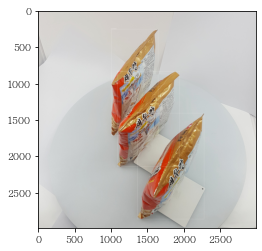

In [ ]:
random.seed(0)

class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))
font=ImageFont.truetype("C:/Windows/Fonts/batang.ttc",10)

def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))],font=font,encoding='utf8')
    
    plt.imshow(np.array(image))
    plt.show()

# Get any random annotation file 
annotation_file = random.choice(annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("annotations", "images").replace("txt", "jpg")
assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

In [ ]:
# Read images and annotations
images = [os.path.join('images', x) for x in os.listdir('images')]
annotations = [os.path.join('annotations', x) for x in os.listdir('annotations') if x[-3:] == "txt"]

images.sort()
annotations.sort()

# Split the dataset into train-valid-test splits 
train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.15, random_state = 1)
# val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

In [ ]:
make_dir('images/train')
make_dir('images/val')
# make_dir('images/test')
# make_dir('annotations/train')
# make_dir('annotations/val')
# make_dir('annotations/test')

images/train 폴더가 생성되었습니다.
images/val 폴더가 생성되었습니다.


In [ ]:
#Utility function to move images 
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

# Move the splits into their folders
move_files_to_folder(train_images, 'images/train')
move_files_to_folder(val_images, 'images/val/')
# move_files_to_folder(test_images, 'images/test/')
move_files_to_folder(train_annotations, 'images/train/')
move_files_to_folder(val_annotations, 'images/val/')
# move_files_to_folder(test_annotations, 'annotations/test/')